# Red n Black Tree
## Credit:
https://favtutor.com/blogs/red-black-tree-python

## Time Complexity
For insertion, deletion, and search operation, the time complexity for the red-black tree is logarithmic function i.e. **O(log n)** 

where:- **n** is the **total number of nodes** in the red-black tree.  

## Space Complexity 
Whereas, the Space Complexity of the red-black tree is **O(n)**.

## Difference between Red-Black Tree and AVL Tree
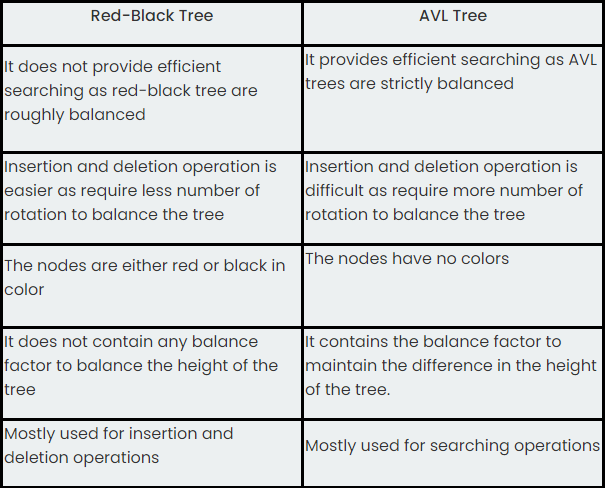

## Advantages of Red-Black Tree
Red-black tree balance the height of the binary tree
Red-black tree takes less time to structure the tree by restoring the height of the binary tree
The time complexity for search operation is O(log n)
It has comparatively low constants in a wide range of scenarios
## Disadvantages of Red-Black Tree
Relatively complicated to implement
The red-black tree is not rigidly balanced in comparison to the AVL tree
## Applications of Red-Black Tree
A red-black tree is used to implement the finite maps
It is most important to implement the Java Libraries Packages like java.util.TreeSet and java.util.TreeMap
A red-black tree is used while building the Linux kernel
A red-black tree is used to implement the standard template library in C++
It is used to implement the CPU scheduling algorithm like “completely fair scheduler” in Linux.
A red-black tree is used in reducing the time complexity in the K-mean clustering algorithm
It is used in MySQL for table indexing
A red-black tree is used in Computation Geometry Data structure
It is useful to keep track of the virtual memory segments for the process
Hashmap data structure makes use of the red-black tree to store the key-value pair instead of linked-list for the faster search operation
## Conclusion
The red-black tree is one of the members of the binary search tree which helps to maintain the height of the binary tree just like the AVL tree. Every node in the binary search tree is colored either red or black which further helps to maintain the properties of the tree and provides an effective and efficient method for insertion and deletion operations of the node in the binary tree by undergoing a fewer rotation. Therefore it is important to understand and make use of the red-black tree to enhance the searching time complexity of the binary search tree by preventing the tree from skewing. For more details, please refer to our extensive tutor program designed by experts at Favtutor. 

In [1]:
# Define Node
class Node():
    def __init__(self,val):
        self.val = val                                   # Value of Node
        self.parent = None                               # Parent of Node
        self.left = None                                 # Left Child of Node
        self.right = None                                # Right Child of Node
        self.color = 1                                   # Red Node as new node is always inserted as Red Node

# Define R-B Tree
class RBTree():
    def __init__(self):
        self.NULL = Node ( 0 )
        self.NULL.color = 0
        self.NULL.left = None
        self.NULL.right = None
        self.root = self.NULL


    # Insert New Node
    def insertNode(self, key):
        node = Node(key)
        node.parent = None
        node.val = key
        node.left = self.NULL
        node.right = self.NULL
        node.color = 1                                   # Set root colour as Red

        y = None
        x = self.root

        while x != self.NULL :                           # Find position for new node
            y = x
            if node.val < x.val :
                x = x.left
            else :
                x = x.right

        node.parent = y                                  # Set parent of Node as y
        if y == None :                                   # If parent i.e, is none then it is root node
            self.root = node
        elif node.val < y.val :                          # Check if it is right Node or Left Node by checking the value
            y.left = node
        else :
            y.right = node

        if node.parent == None :                         # Root node is always Black
            node.color = 0
            return

        if node.parent.parent == None :                  # If parent of node is Root Node
            return

        self.fixInsert ( node )                          # Else call for Fix Up


    def minimum(self, node):
        while node.left != self.NULL:
            node = node.left
        return node


    # Code for left rotate
    def LR ( self , x ) :
        y = x.right                                      # Y = Right child of x
        x.right = y.left                                 # Change right child of x to left child of y
        if y.left != self.NULL :
            y.left.parent = x

        y.parent = x.parent                              # Change parent of y as parent of x
        if x.parent == None :                            # If parent of x == None ie. root node
            self.root = y                                # Set y as root
        elif x == x.parent.left :
            x.parent.left = y
        else :
            x.parent.right = y
        y.left = x
        x.parent = y


    # Code for right rotate
    def RR ( self , x ) :
        y = x.left                                       # Y = Left child of x
        x.left = y.right                                 # Change left child of x to right child of y
        if y.right != self.NULL :
            y.right.parent = x

        y.parent = x.parent                              # Change parent of y as parent of x
        if x.parent == None :                            # If x is root node
            self.root = y                                # Set y as root
        elif x == x.parent.right :
            x.parent.right = y
        else :
            x.parent.left = y
        y.right = x
        x.parent = y


    # Fix Up Insertion
    def fixInsert(self, k):
        while k.parent.color == 1:                        # While parent is red
            if k.parent == k.parent.parent.right:         # if parent is right child of its parent
                u = k.parent.parent.left                  # Left child of grandparent
                if u.color == 1:                          # if color of left child of grandparent i.e, uncle node is red
                    u.color = 0                           # Set both children of grandparent node as black
                    k.parent.color = 0
                    k.parent.parent.color = 1             # Set grandparent node as Red
                    k = k.parent.parent                   # Repeat the algo with Parent node to check conflicts
                else:
                    if k == k.parent.left:                # If k is left child of it's parent
                        k = k.parent
                        self.RR(k)                        # Call for right rotation
                    k.parent.color = 0
                    k.parent.parent.color = 1
                    self.LR(k.parent.parent)
            else:                                         # if parent is left child of its parent
                u = k.parent.parent.right                 # Right child of grandparent
                if u.color == 1:                          # if color of right child of grandparent i.e, uncle node is red
                    u.color = 0                           # Set color of childs as black
                    k.parent.color = 0
                    k.parent.parent.color = 1             # set color of grandparent as Red
                    k = k.parent.parent                   # Repeat algo on grandparent to remove conflicts
                else:
                    if k == k.parent.right:               # if k is right child of its parent
                        k = k.parent
                        self.LR(k)                        # Call left rotate on parent of k
                    k.parent.color = 0
                    k.parent.parent.color = 1
                    self.RR(k.parent.parent)              # Call right rotate on grandparent
            if k == self.root:                            # If k reaches root then break
                break
        self.root.color = 0                               # Set color of root as black


    # Function to fix issues after deletion
    def fixDelete ( self , x ) :
        while x != self.root and x.color == 0 :           # Repeat until x reaches nodes and color of x is black
            if x == x.parent.left :                       # If x is left child of its parent
                s = x.parent.right                        # Sibling of x
                if s.color == 1 :                         # if sibling is red
                    s.color = 0                           # Set its color to black
                    x.parent.color = 1                    # Make its parent red
                    self.LR ( x.parent )                  # Call for left rotate on parent of x
                    s = x.parent.right
                # If both the child are black
                if s.left.color == 0 and s.right.color == 0 :
                    s.color = 1                           # Set color of s as red
                    x = x.parent
                else :
                    if s.right.color == 0 :               # If right child of s is black
                        s.left.color = 0                  # set left child of s as black
                        s.color = 1                       # set color of s as red
                        self.RR ( s )                     # call right rotation on x
                        s = x.parent.right

                    s.color = x.parent.color
                    x.parent.color = 0                    # Set parent of x as black
                    s.right.color = 0
                    self.LR ( x.parent )                  # call left rotation on parent of x
                    x = self.root
            else :                                        # If x is right child of its parent
                s = x.parent.left                         # Sibling of x
                if s.color == 1 :                         # if sibling is red
                    s.color = 0                           # Set its color to black
                    x.parent.color = 1                    # Make its parent red
                    self.RR ( x.parent )                  # Call for right rotate on parent of x
                    s = x.parent.left

                if s.right.color == 0 and s.right.color == 0 :
                    s.color = 1
                    x = x.parent
                else :
                    if s.left.color == 0 :                # If left child of s is black
                        s.right.color = 0                 # set right child of s as black
                        s.color = 1
                        self.LR ( s )                     # call left rotation on x
                        s = x.parent.left

                    s.color = x.parent.color
                    x.parent.color = 0
                    s.left.color = 0
                    self.RR ( x.parent )
                    x = self.root
        x.color = 0


    # Function to transplant nodes
    def __rb_transplant ( self , u , v ) :
        if u.parent == None :
            self.root = v
        elif u == u.parent.left :
            u.parent.left = v
        else :
            u.parent.right = v
        v.parent = u.parent


    # Function to handle deletion
    def delete_node_helper ( self , node , key ) :
        z = self.NULL
        while node != self.NULL :                          # Search for the node having that value/ key and store it in 'z'
            if node.val == key :
                z = node

            if node.val <= key :
                node = node.right
            else :
                node = node.left

        if z == self.NULL :                                # If Kwy is not present then deletion not possible so return
            print ( "Value not present in Tree !!" )
            return

        y = z
        y_original_color = y.color                          # Store the color of z- node
        if z.left == self.NULL :                            # If left child of z is NULL
            x = z.right                                     # Assign right child of z to x
            self.__rb_transplant ( z , z.right )            # Transplant Node to be deleted with x
        elif (z.right == self.NULL) :                       # If right child of z is NULL
            x = z.left                                      # Assign left child of z to x
            self.__rb_transplant ( z , z.left )             # Transplant Node to be deleted with x
        else :                                              # If z has both the child nodes
            y = self.minimum ( z.right )                    # Find minimum of the right sub tree
            y_original_color = y.color                      # Store color of y
            x = y.right
            if y.parent == z :                              # If y is child of z
                x.parent = y                                # Set parent of x as y
            else :
                self.__rb_transplant ( y , y.right )
                y.right = z.right
                y.right.parent = y

            self.__rb_transplant ( z , y )
            y.left = z.left
            y.left.parent = y
            y.color = z.color
        if y_original_color == 0 :                          # If color is black then fixing is needed
            self.fixDelete ( x )


    # Deletion of node
    def delete_node ( self , val ) :
        self.delete_node_helper ( self.root , val )         # Call for deletion


    # Function to print
    def __printCall ( self , node , indent , last ) :
        if node != self.NULL :
            print(indent, end=' ')
            if last :
                print ("R----",end= ' ')
                indent += "     "
            else :
                print("L----",end=' ')
                indent += "|    "

            s_color = "RED" if node.color == 1 else "BLACK"
            print ( str ( node.val ) + "(" + s_color + ")" )
            self.__printCall ( node.left , indent , False )
            self.__printCall ( node.right , indent , True )

    # Function to call print
    def print_tree ( self ) :
        self.__printCall ( self.root , "" , True )


if __name__ == "__main__":
    bst = RBTree()

    bst.insertNode(10)
    bst.insertNode(20)
    bst.insertNode(30)
    bst.insertNode(5)
    bst.insertNode(4)
    bst.insertNode(2)

    bst.print_tree()

    print("\nAfter deleting an element")
    bst.delete_node(2)
    bst.print_tree()

 R---- 20(BLACK)
      L---- 5(RED)
     |     L---- 4(BLACK)
     |    |     L---- 2(RED)
     |     R---- 10(BLACK)
      R---- 30(BLACK)

After deleting an element
 R---- 20(BLACK)
      L---- 5(RED)
     |     L---- 4(BLACK)
     |     R---- 10(BLACK)
      R---- 30(BLACK)
